# Credit Risk Assessment 
## Assess whether a credit applicant represents a credit risk based on given information

## Import Libraries

In [1]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install cufflinks

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, r2_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
import plotly.tools as tls
import plotly.plotly as py
import plotly.graph_objs as go
#import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected= True)
#cf.go_offline()
import plotly.plotly as py
from plotly.graph_objs import *
py.sign_in('aabdalla1088', 'IAHOHh0PZiyfSFOJlQ6G')
# Just to ignore warnings
import warnings
warnings.filterwarnings('ignore')

PlotlyError: Sign in failed.

## Import Data and Explore

In [4]:
df = pd.read_csv('dataset_31_credit-g.csv')

In [5]:
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,'<0',6,'critical/other existing credit',radio/tv,1169,'no known savings','>=7',4,'male single',none,...,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,'0<=X<200',48,'existing paid',radio/tv,5951,'<100','1<=X<4',2,'female div/dep/mar',none,...,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,'<100','4<=X<7',2,'male single',none,...,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,'<0',42,'existing paid',furniture/equipment,7882,'<100','4<=X<7',2,'male single',guarantor,...,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,'<0',24,'delayed previously','new car',4870,'<100','1<=X<4',3,'male single',none,...,'no known property',53,none,'for free',2,skilled,2,none,yes,bad


## Spliting the "personal_status" column into 2 columns

In [6]:
# new data frame with split value columns 
new = df["personal_status"].str.split(" ", n = 1, expand = True) 
  
# making separate first name column from new data frame 
df["Gender"]= new[0] 
  
# making separate last name column from new data frame 
df["Personal_Status"]= new[1] 
  
# Dropping old Name columns 
df.drop(columns =["personal_status"], inplace = True) 
  
# df display 
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,other_parties,residence_since,...,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class,Gender,Personal_Status
0,'<0',6,'critical/other existing credit',radio/tv,1169,'no known savings','>=7',4,none,4,...,none,own,2,skilled,1,yes,yes,good,'male,single'
1,'0<=X<200',48,'existing paid',radio/tv,5951,'<100','1<=X<4',2,none,2,...,none,own,1,skilled,1,none,yes,bad,'female,div/dep/mar'
2,'no checking',12,'critical/other existing credit',education,2096,'<100','4<=X<7',2,none,3,...,none,own,1,'unskilled resident',2,none,yes,good,'male,single'
3,'<0',42,'existing paid',furniture/equipment,7882,'<100','4<=X<7',2,guarantor,4,...,none,'for free',1,skilled,2,none,yes,good,'male,single'
4,'<0',24,'delayed previously','new car',4870,'<100','1<=X<4',3,none,4,...,none,'for free',2,skilled,2,none,yes,bad,'male,single'


In [7]:
df.columns

Index(['checking_status', 'duration', 'credit_history', 'purpose',
       'credit_amount', 'savings_status', 'employment',
       'installment_commitment', 'other_parties', 'residence_since',
       'property_magnitude', 'age', 'other_payment_plans', 'housing',
       'existing_credits', 'job', 'num_dependents', 'own_telephone',
       'foreign_worker', 'class', 'Gender', 'Personal_Status'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
checking_status           1000 non-null object
duration                  1000 non-null int64
credit_history            1000 non-null object
purpose                   1000 non-null object
credit_amount             1000 non-null int64
savings_status            1000 non-null object
employment                1000 non-null object
installment_commitment    1000 non-null int64
other_parties             1000 non-null object
residence_since           1000 non-null int64
property_magnitude        1000 non-null object
age                       1000 non-null int64
other_payment_plans       1000 non-null object
housing                   1000 non-null object
existing_credits          1000 non-null int64
job                       1000 non-null object
num_dependents            1000 non-null int64
own_telephone             1000 non-null object
foreign_worker            1000 non-null object
class   

In [9]:
df.count()

checking_status           1000
duration                  1000
credit_history            1000
purpose                   1000
credit_amount             1000
savings_status            1000
employment                1000
installment_commitment    1000
other_parties             1000
residence_since           1000
property_magnitude        1000
age                       1000
other_payment_plans       1000
housing                   1000
existing_credits          1000
job                       1000
num_dependents            1000
own_telephone             1000
foreign_worker            1000
class                     1000
Gender                    1000
Personal_Status           1000
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
checking_status           1000 non-null object
duration                  1000 non-null int64
credit_history            1000 non-null object
purpose                   1000 non-null object
credit_amount             1000 non-null int64
savings_status            1000 non-null object
employment                1000 non-null object
installment_commitment    1000 non-null int64
other_parties             1000 non-null object
residence_since           1000 non-null int64
property_magnitude        1000 non-null object
age                       1000 non-null int64
other_payment_plans       1000 non-null object
housing                   1000 non-null object
existing_credits          1000 non-null int64
job                       1000 non-null object
num_dependents            1000 non-null int64
own_telephone             1000 non-null object
foreign_worker            1000 non-null object
class   

In [11]:
df.isnull().sum()

checking_status           0
duration                  0
credit_history            0
purpose                   0
credit_amount             0
savings_status            0
employment                0
installment_commitment    0
other_parties             0
residence_since           0
property_magnitude        0
age                       0
other_payment_plans       0
housing                   0
existing_credits          0
job                       0
num_dependents            0
own_telephone             0
foreign_worker            0
class                     0
Gender                    0
Personal_Status           0
dtype: int64

In [12]:
#no duplicates found
df.duplicated(df.columns, keep='first').sum()

0

In [13]:
import missingno as msno
msno.matrix(df)  # just to visualize. no missing values.

ModuleNotFoundError: No module named 'missingno'

In [14]:
df.describe()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


## Exploring insights and trends
### Exploring our Target the "Class": Imbalanced Classification Problem

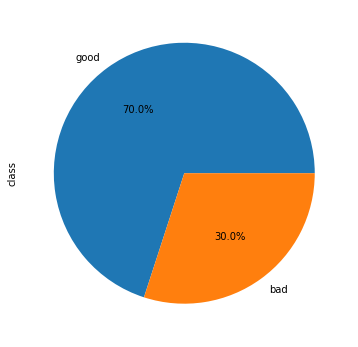

In [15]:
plt.figure(1, figsize=(6,6))
df['class'].value_counts().plot.pie(autopct="%1.1f%%")


### Data insights and trends 

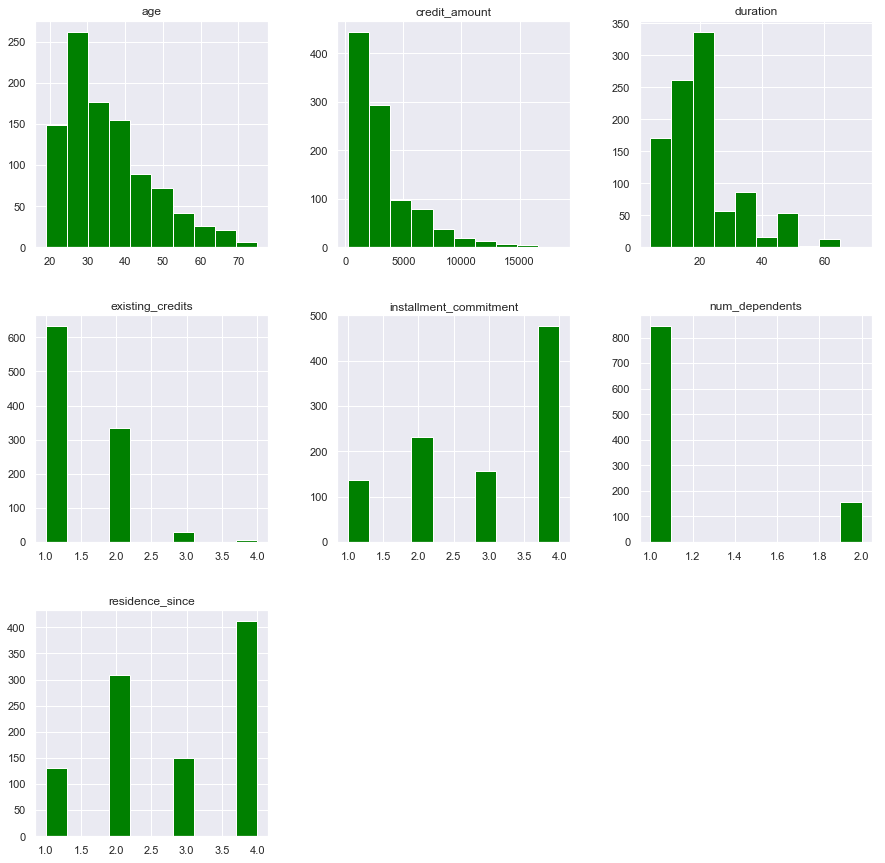

In [16]:
sns.set()
df.hist(figsize=(15,15), color='green')
plt.show()

In [17]:
df["existing_credits"].value_counts()

1    633
2    333
3     28
4      6
Name: existing_credits, dtype: int64

In [18]:
df_good = df.loc[df["class"] == 'good']['age'].values.tolist()
df_bad = df.loc[df["class"] == 'bad']['age'].values.tolist()
df_age = df['age'].values.tolist()

#First plot
trace0 = go.Histogram(x=df_good, histnorm='probability', name="Good Credit")

#Second plot
trace1 = go.Histogram(x=df_bad, histnorm='probability',name="Bad Credit")

#Third plot
trace2 = go.Histogram(x=df_age, histnorm='probability', name="Overall Age")

#Creating the grid
fig = tls.make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]],subplot_titles=('Good','Bad', 'General Distribuition'))

#setting the figs
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig.append_trace(trace2, 2, 1)

fig['layout'].update(showlegend=True, title='Age Distribuition', bargap=0.05)
py.iplot(fig, filename='basic histogram')

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]
[ (2,1) x3,y3           -      ]

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~aabdalla1088/0 or inside your plot.ly account where it is named 'basic histogram'


/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [19]:
#First plot
trace0 = go.Bar(x = df[df["class"]== 'good']["Gender"].value_counts().index.values, y = df[df["class"]== 'good']["Gender"].value_counts().values, name='Good credit')

#First plot 2
trace1 = go.Bar(x = df[df["class"]== 'bad']["Gender"].value_counts().index.values, y = df[df["class"]== 'bad']["Gender"].value_counts().values, name="Bad Credit")

#Second plot
trace2 = go.Box(x = df[df["class"]== 'good']["Gender"],
    y = df[df["class"]== 'good']["credit_amount"], name=trace0.name)

#Second plot 2
trace3 = go.Box(x = df[df["class"]== 'bad']["Gender"], y = df[df["class"]== 'bad']["credit_amount"], name=trace1.name)

data = [trace0, trace1, trace2,trace3]


fig = tls.make_subplots(rows=1, cols=2, subplot_titles=('Sex Count', 'Credit Amount by Sex'))

fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
fig.append_trace(trace3, 1, 2)

fig['layout'].update(height=400, width=800, title='Sex Distribuition', boxmode='group')
py.iplot(fig, filename='sex-subplot')

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [20]:
#First plot
trace0 = go.Bar(x = df[df["class"] == 'good']["job"].value_counts().index.values, y = df[df["class"]== 'good']["job"].value_counts().values, name='Good credit Distribuition')

#Second plot
trace1 = go.Bar(x = df[df["class"]== 'bad']["job"].value_counts().index.values, y = df[df["class"]== 'bad']["job"].value_counts().values, name="Bad Credit Distribuition")

data = [trace0, trace1]

layout = go.Layout(title='Job Distribuition')

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='grouped-bar')

/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [21]:
#First plot
trace0 = go.Bar(x = df[df["class"]== 'good']["housing"].value_counts().index.values, y = df[df["class"]== 'good']["housing"].value_counts().values, name='Good credit')

#Second plot
trace1 = go.Bar(x = df[df["class"]== 'bad']["housing"].value_counts().index.values,y = df[df["class"]== 'bad']["housing"].value_counts().values, name="Bad Credit")

data = [trace0, trace1]

layout = go.Layout(title='Housing Distribuition')

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='Housing-Grouped')


/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



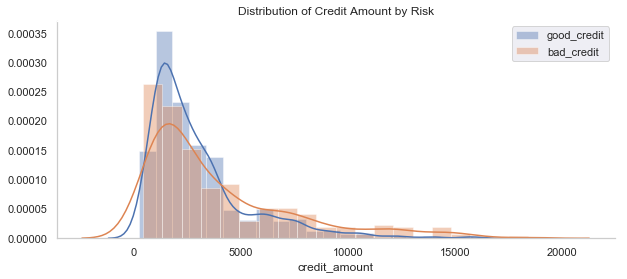

In [22]:
# Credit amount distribution
fig, ax = plt.subplots(figsize=(10, 4))
risk_good = df.loc[df['class'] == 'good']
risk_bad = df.loc[df['class'] == 'bad']
ax = sns.distplot(risk_good['credit_amount'], bins=20, label='good_credit')
ax = sns.distplot(risk_bad['credit_amount'], bins=20, label='bad_credit')
ax.set_title('Distribution of Credit Amount by Risk')
ax.patch.set_facecolor('#FFFFFF')
ax.spines['bottom'].set_color('#CCCCCC')
ax.spines['left'].set_color('#CCCCCC')
ax.spines['top'].set_color('#FFFFFF')
ax.spines['right'].set_color('#FFFFFF')
plt.legend()
plt.show()

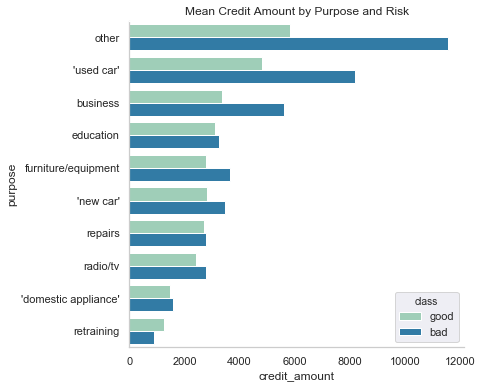

In [23]:
# Bringing forth risk
idx_sorted = df.groupby('purpose').mean()['credit_amount'].sort_values(ascending=False).index
fig, ax = plt.subplots(figsize=(6,6))
ax = sns.barplot(x='credit_amount', y='purpose', data=df, ci=None, hue='class',
            palette="YlGnBu", order=idx_sorted)
ax.set_title('Mean Credit Amount by Purpose and Risk')
ax.patch.set_facecolor('#FFFFFF')
ax.spines['bottom'].set_color('#CCCCCC')
ax.spines['left'].set_color('#CCCCCC')
ax.spines['top'].set_color('#FFFFFF')
ax.spines['right'].set_color('#FFFFFF')
plt.show()

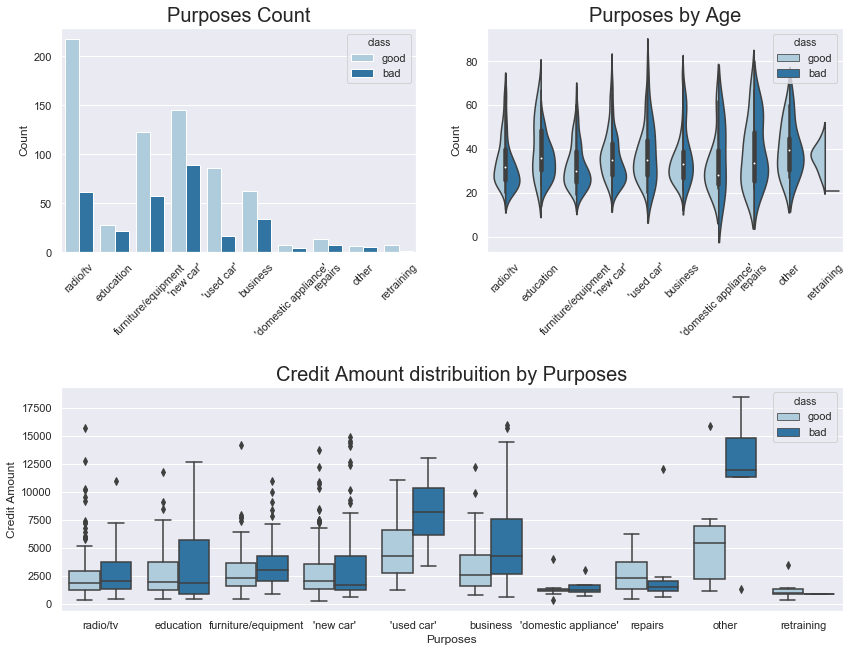

In [24]:
plt.figure(figsize = (14,12))

plt.subplot(221)
g = sns.countplot(x="purpose", data=df, palette="Paired", hue = "class")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Count", fontsize=12)
g.set_title("Purposes Count", fontsize=20)

plt.subplot(222)
g1 = sns.violinplot(x="purpose", y="age", data=df, palette="Paired", hue = "class",split=True)
g1.set_xticklabels(g1.get_xticklabels(),rotation=45)
g1.set_xlabel("", fontsize=12)
g1.set_ylabel("Count", fontsize=12)
g1.set_title("Purposes by Age", fontsize=20)

plt.subplot(212)
g2 = sns.boxplot(x="purpose", y="credit_amount", data=df, palette="Paired", hue = "class")
g2.set_xlabel("Purposes", fontsize=12)
g2.set_ylabel("Credit Amount", fontsize=12)
g2.set_title("Credit Amount distribuition by Purposes", fontsize=20)

plt.subplots_adjust(hspace = 0.6, top = 0.8)

plt.show()



### Exploring Trends & Relationships

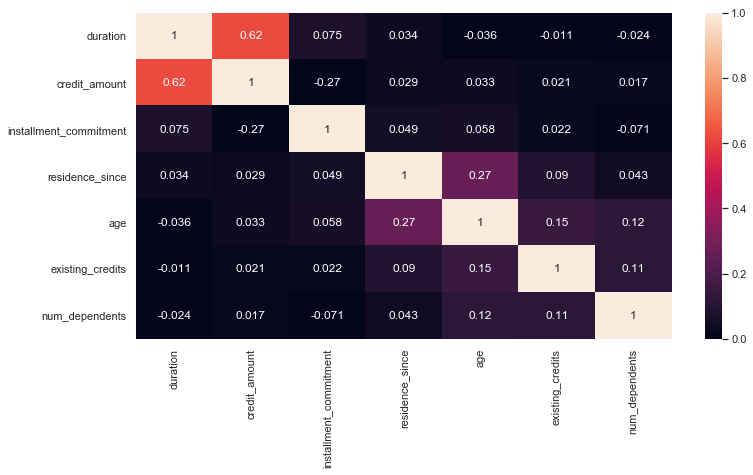

In [25]:
fig, ax = plt.subplots(1, 1, figsize = (12, 6))
sns.heatmap(df.corr(), annot=True, ax = ax, vmin = 0, vmax = 1)

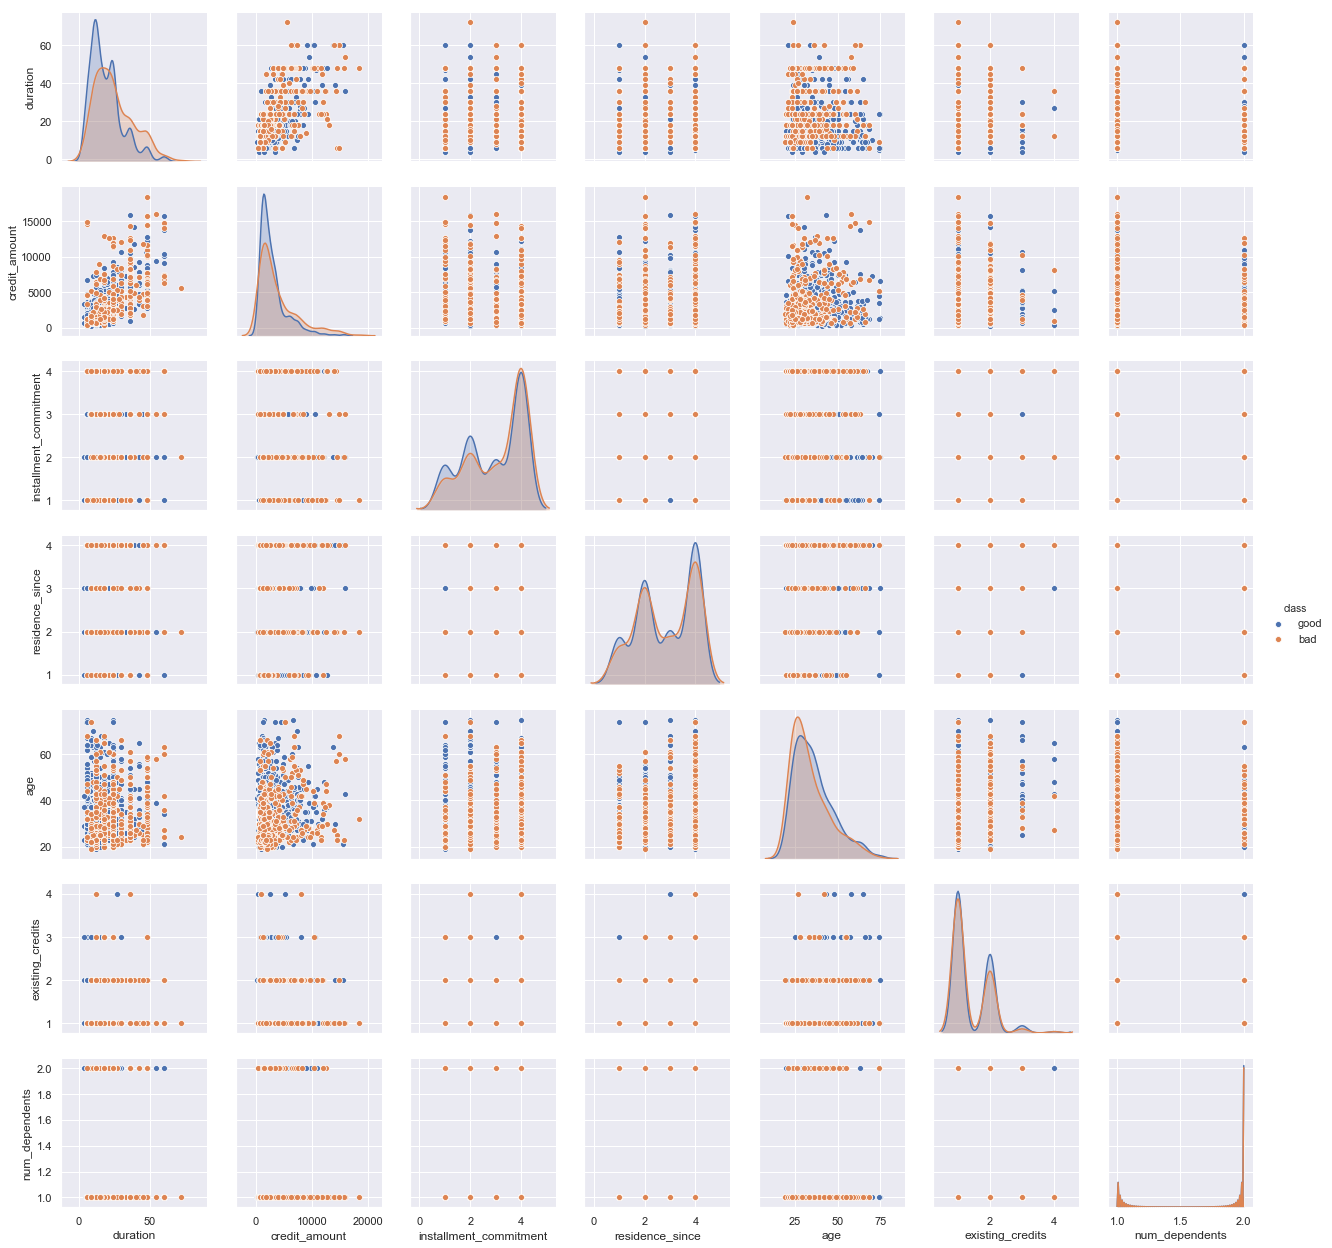

In [26]:
sns.pairplot(df, hue = 'class')

## Pairplot shows relationship among "duration & credit_amount & age" 

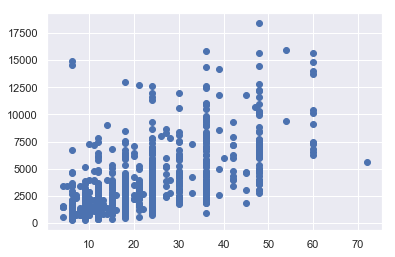

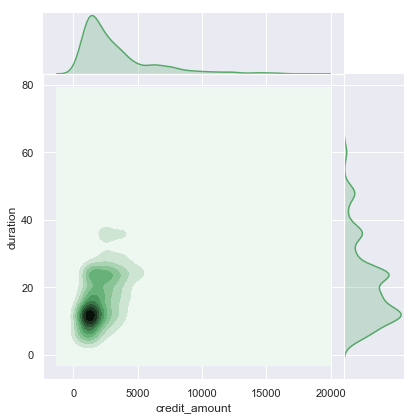

In [27]:
plt.scatter(y='credit_amount',x='duration',data=df, color='b')
sns.jointplot("credit_amount","duration", data=df, kind="kde", space=0, color="g",  height=6)
plt.show()

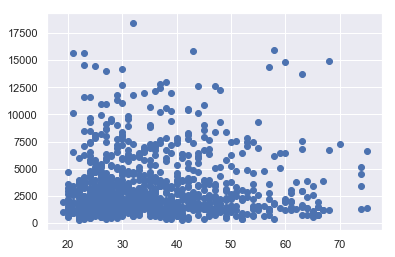

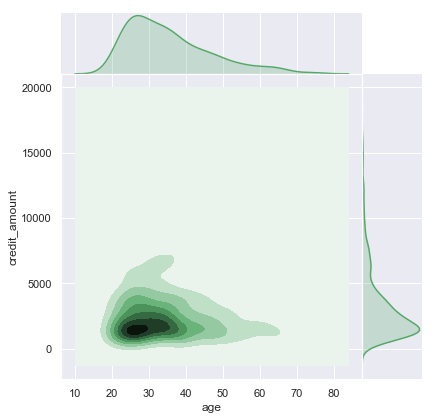

In [28]:
plt.scatter(y='credit_amount',x='age',data=df, color='b')
sns.jointplot("age","credit_amount", data=df, kind="kde", space=0, color="g",  height=6)
plt.show()

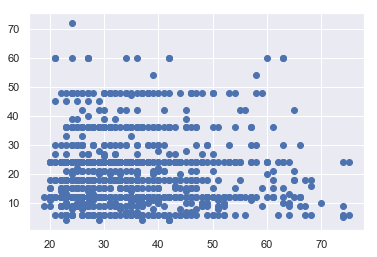

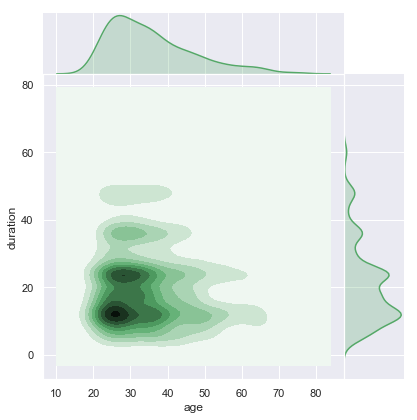

In [29]:
plt.scatter(y='duration',x='age',data=df, color='b')
sns.jointplot("age", "duration", data=df, kind="kde", space=0, color="g",  height=6)
plt.show()

## Label Enconding the rest of the columns

In [30]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in df:
    if df[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(df[col].unique())) <= 21:
            # Train on the training data
            le.fit(df[col])
            # Transform both training and testing data
            df[col] = le.transform(df[col])
        
        
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

15 columns were label encoded.


In [31]:
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,other_parties,residence_since,...,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class,Gender,Personal_Status
0,1,6,1,7,1169,4,3,4,2,4,...,1,1,2,3,1,1,1,1,1,3
1,0,48,3,7,5951,2,0,2,2,2,...,1,1,1,3,1,0,1,0,0,0
2,3,12,1,4,2096,2,1,2,2,3,...,1,1,1,2,2,0,1,1,1,3
3,1,42,3,5,7882,2,1,2,1,4,...,1,0,1,3,2,0,1,1,1,3
4,1,24,2,1,4870,2,0,3,2,4,...,1,0,2,3,2,0,1,0,1,3


Text(0.5, 0, 'credit_amount')

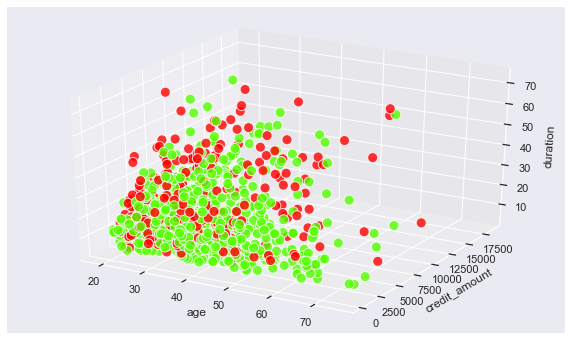

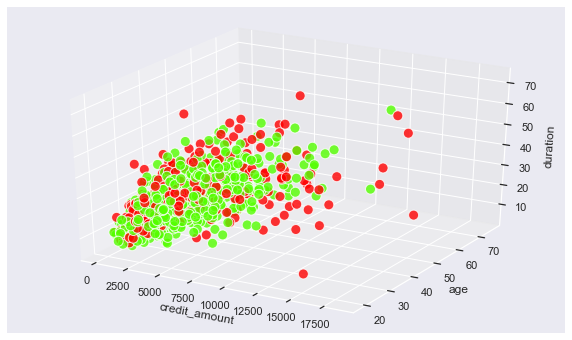

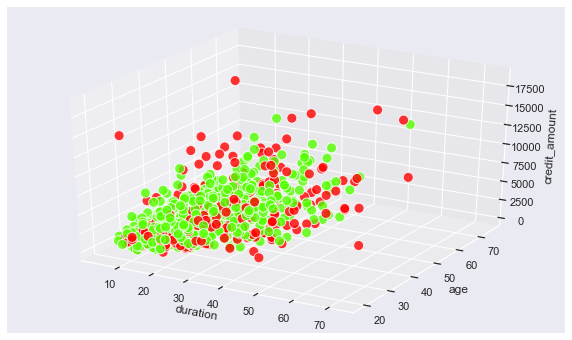

In [32]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')

xs = df['age']
ys = df['credit_amount']
zs = df['duration']

ax.scatter(xs, ys, zs, c=df['class'], cmap = plt.prism(),s=100, alpha=0.8, edgecolors='w')

ax.set_xlabel('age')
ax.set_ylabel('credit_amount')
ax.set_zlabel('duration')

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')

xs = df['credit_amount']
ys = df['age']
zs = df['duration']

ax.scatter(xs, ys, zs, c=df['class'], cmap = plt.prism(),s=100, alpha=0.8, edgecolors='w')

ax.set_xlabel('credit_amount')
ax.set_ylabel('age')
ax.set_zlabel('duration')

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')

xs = df['duration']
ys = df['age']
zs = df['credit_amount']

ax.scatter(xs, ys, zs,  c=df['class'], cmap = plt.prism(),s=100, alpha=0.8, edgecolors='w')


ax.set_xlabel('duration')
ax.set_ylabel('age')
ax.set_zlabel('credit_amount')

In [33]:
x, y, z = df['age'], df['duration'], df['credit_amount']
trace1 = go.Scatter3d(x= x, y=y, z= z, mode='markers', marker=dict(size=12, color= x, colorscale='Jet', opacity=0.8))

data = [trace1]
layout = go.Layout(margin=dict(l=0, r=0, b=0, t=0))
fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='3d-scatter-colorscale')

/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning:

invalid value encountered in true_divide

/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning:

invalid value encountered in double_scalars



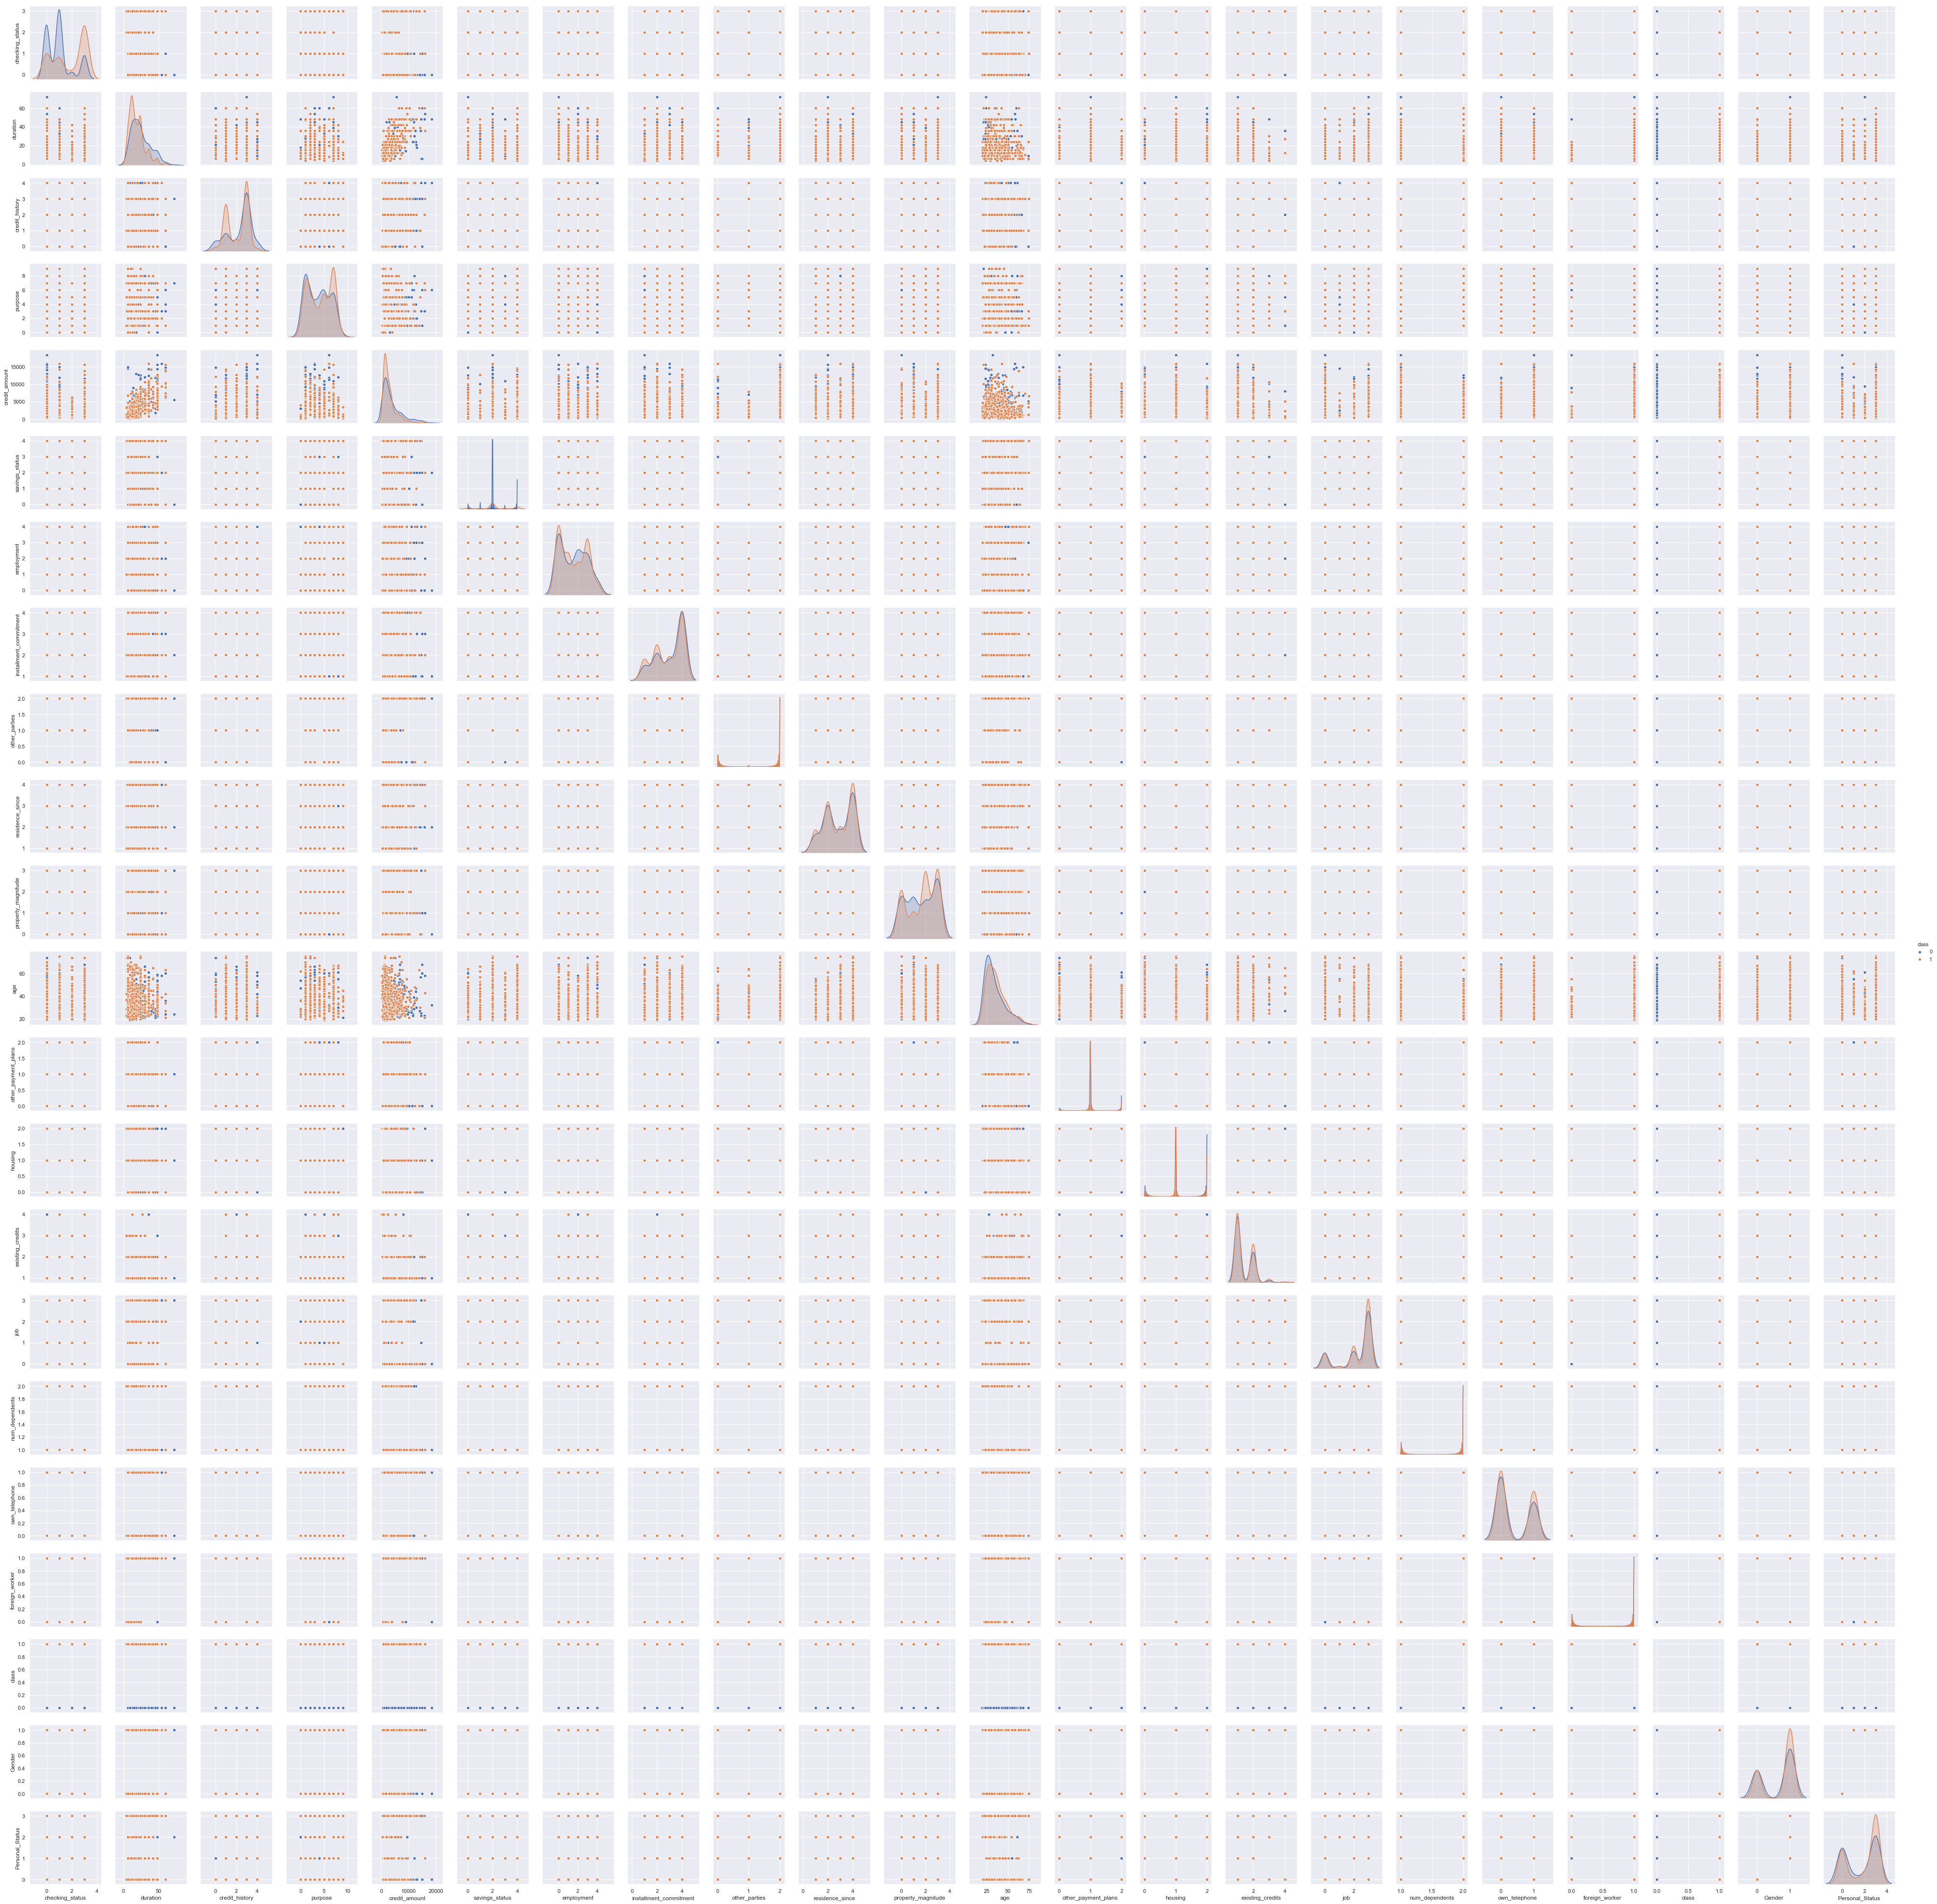

In [34]:
sns.pairplot(df, hue = 'class')

# Investigating some features

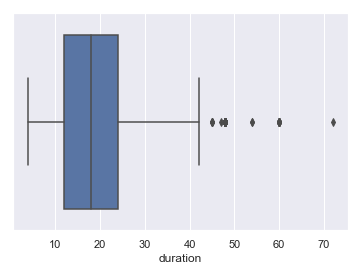

In [35]:
sns.boxplot(df.duration)

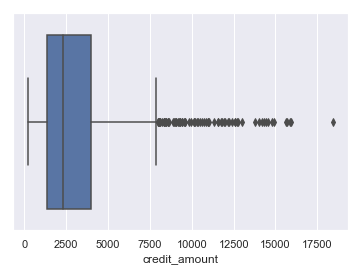

In [36]:
sns.boxplot(df.credit_amount)

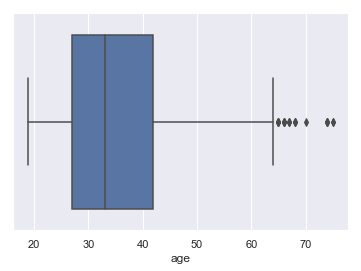

In [37]:
sns.boxplot(df.age)

# First Raw Analysis (No Change in Data)

In [62]:
x = df[['checking_status', 'duration', 'credit_history', 'purpose',
       'credit_amount', 'savings_status', 'employment',
       'installment_commitment', 'other_parties', 'residence_since',
       'property_magnitude', 'age', 'other_payment_plans', 'housing',
       'existing_credits', 'job', 'num_dependents', 'own_telephone',
       'foreign_worker', 'Gender', 'Personal_Status']]
y = df[['class']]

In [46]:
y=y.astype("category")

In [47]:
#target should be category and see if it impacts

y.dtypes

class    category
dtype: object

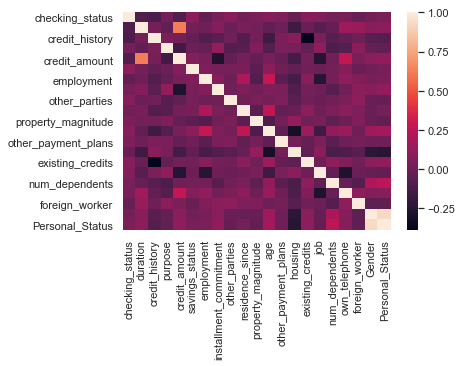

In [49]:
sns.heatmap(x.corr())

In [56]:
from sklearn.ensemble import ExtraTreesClassifier


# feature extraction
model = ExtraTreesClassifier()
model.fit(x, y)
print(model.feature_importances_*100)

[11.45439698  8.51818395  6.28114667  5.56236327  7.24169659  5.48601528
  5.55903016  5.15822785  2.34437834  5.32346045  4.8468248   7.18653801
  3.39072537  3.49424968  2.74217213  4.1526804   1.99886551  3.31094457
  0.86762758  1.71140265  3.36906976]


/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)
y_pred = rf_random.predict(X_test)
print(r2_score(y_test, y_pred))

In [69]:
_x=np.array(x)
_y=np.array(np.array(y).flatten())
_y.shape

(1000,)

In [71]:
## example from https://libraries.io/pypi/ReliefF

from ReliefF import ReliefF


X_train, X_test, y_train, y_test = train_test_split(_x, _y, test_size=0.2, random_state=0)

fs = ReliefF(n_neighbors=100, n_features_to_keep=10)
fs.fit_transform(X_train, y_train)
X_test_subset = fs.transform(X_test)
#print(X_test.shape, X_test_subset.shape)
X_test_subset

array([[1, 1, 2, ..., 0, 1, 3],
       [0, 1, 1, ..., 3, 0, 3],
       [1, 1, 2, ..., 3, 1, 3],
       ...,
       [1, 1, 2, ..., 2, 0, 1],
       [1, 1, 2, ..., 0, 1, 2],
       [1, 0, 2, ..., 3, 1, 3]])

In [ ]:
# x_train=x.sample(frac=0.7)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

from sklearn.preprocessing import MinMaxScaler
xs=MinMaxScaler()
# x_train[x_train.columns] = xs.fit_transform(x_train[x_train.columns])
# x_test[x_test.columns] = xs.transform(x_test[x_test.columns])

x_train= xs.fit_transform(x_train)
x_test = xs.transform(x_test)
# print(chance)
# y_train=pd.to_numeric(y_train)

# y_train=y_train[np.where(y_train>0.82)]
# print(y_train['class'])
#[print(chance) for chance in y_train['class']]
# cy_train=np.array(y_train)
y_test=[1 if chance > 0.82 else 0 for chance in y_test]
# cy_test=np.array(y_test)
y_train=[1 if chance > 0.82 else 0 for chance in y_train]
all_models=[LogisticRegression(), RandomForestClassifier(), SVC()]


for model in all_models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    matrix = confusion_matrix(y_test, y_pred)
    print(accuracy_score(y_test, y_pred))
    print(matrix)
    print(mean_squared_error(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print(accuracy_score)
    from sklearn.metrics import roc_curve
    fpr, tpr, threshold = roc_curve(y_test, y_pred)
    probs = model.predict_proba(x_test)[:,1]
    fprs, tprs, thesholds  = roc_curve(y_test, probs)
    from sklearn.metrics import precision_recall_curve
    precision, recall, pre  = precision_recall_curve(y_test, probs)
    y_pred_prob = model.predict_proba(x_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, color='darkorange', label='ROC curve' )
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()
    
    model=None

# Logistic Regression

# KNN

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x = scaler.fit_transform(x)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, y_pred)
print(matrix)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
print(model.score(x_test, y_test))
print(classification_report(y_test, y_pred))
print(accuracy_score)

In [ ]:
y_pred_prob = model.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, color='darkorange', label='ROC curve' )
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Naive Bayes Classification

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

from sklearn.naive_bayes import GaussianNB
model = GaussianNB().fit(x_train, y_train)

y_pred = model.predict(x_test)

from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = matrix.ravel()
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, y_pred)
print(matrix)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
print(model.score(x_test, y_test))
print(classification_report(y_test, y_pred))
print(accuracy_score)

In [ ]:
y_pred_prob = model.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, color='darkorange', label='ROC curve' )
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Bernoulli Naive Bayes Classification

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

from sklearn.naive_bayes import BernoulliNB
model = BernoulliNB().fit(x_train, y_train)

y_pred = model.predict(x_test)

from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, y_pred)
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, y_pred)
print(matrix)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
print(model.score(x_test, y_test))

print(classification_report(y_test, y_pred))
print(accuracy_score)

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, threshold = roc_curve(y_test, y_pred)
y_pred_prob = model.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, color='darkorange', label='ROC curve' )
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

## ANN

In [ ]:
from sklearn.neural_network import MLPClassifier
# print(x_train)
model.fit(np.asarray(x_train), np.asarray(y_train))
y_pred = model.predict(x_test)
y_pred[np.where(y_pred >= 0.5)]=1
y_pred[np.where(y_pred<0.5)]=0
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
print(classification_report(y_test, y_pred))
print(accuracy_score)

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, threshold = roc_curve(y_test, y_pred)
y_pred_prob = model.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, color='darkorange', label='ROC curve' )
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()

from keras.layers import Dense
input_layer = Dense(units=6, activation='relu', kernel_initializer='uniform')
model.add(input_layer)

hidden_layer = Dense(units=6, activation='relu', kernel_initializer='uniform')
model.add(hidden_layer)

output_layer = Dense(units=1, activation='sigmoid', kernel_initializer='uniform')
model.add(output_layer)

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


In [ ]:
model.fit((x_train), (y_train[:]), batch_size = 10, epochs = 100)

In [ ]:
y_pred = model.predict(x_test)
y_pred[np.where(y_pred >= 0.5)]=1
y_pred[np.where(y_pred<0.5)]=0
from sklearn.metrics import confusion_matrix, accuracy_score
matrix = confusion_matrix(y_test, y_pred)

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, threshold = roc_curve(y_test, y_pred)
y_pred_prob = model.predict_proba(x_test)[:,:]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, color='darkorange', label='ROC curve' )
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Selecting Features

In [ ]:
x = df[['checking_status','purpose','installment_commitment','age','Gender', 'Personal_Status']].values
y = df[['class']].values

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

from sklearn.preprocessing import MinMaxScaler
xs=MinMaxScaler()
#x_train[x_train.columns] = xs.fit_transform(x_train[x_train.columns])
#x_test[x_test.columns] = xs.transform(x_test[x_test.columns])
# print(chance)
# y_train=pd.to_numeric(y_train)

# y_train=y_train[np.where(y_train>0.82)]
# print(y_train['class'])
#[print(chance) for chance in y_train['class']]
# cy_train=np.array(y_train)
y_test=[1 if chance > 0.82 else 0 for chance in y_test]
# cy_test=np.array(y_test)
y_train=[1 if chance > 0.82 else 0 for chance in y_train]
all_models=[LogisticRegression(), RandomForestClassifier(), SVC()]


for model in all_models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    print(model.score(x_test, y_test))
    print(classification_report(y_test, y_pred))

    from sklearn.metrics import roc_curve
    fpr, tpr, threshold = roc_curve(y_test, y_pred)
    y_pred_prob = model.predict_proba(x_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, color='darkorange', label='ROC curve' )
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()
#plt.step(recall, precision, where = 'pre')
    plt.show()
    model=0
    model=None

# Bernoulli Naive Bayes Classification

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

from sklearn.naive_bayes import BernoulliNB
model = BernoulliNB().fit(x_train, y_train)

y_pred = model.predict(x_test)

from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, y_pred)
print(matrix)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
print(model.score(x_test, y_test))

print(classification_report(y_test, y_pred))
print(accuracy_score)

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, threshold = roc_curve(y_test, y_pred)
y_pred_prob = model.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, color='darkorange', label='ROC curve' )
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Selecting Features that highly correlate with each other

In [ ]:
x = df[['checking_status', 'duration','credit_amount', 'employment', 'residence_since', 'age', 'job', 'num_dependents', 'own_telephone', 'Gender', 'Personal_Status']].values
y = df[['class']].values

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

from sklearn.preprocessing import MinMaxScaler
xs=MinMaxScaler()
#x_train[x_train.columns] = xs.fit_transform(x_train[x_train.columns])
#x_test[x_test.columns] = xs.transform(x_test[x_test.columns])
# print(chance)
# y_train=pd.to_numeric(y_train)

# y_train=y_train[np.where(y_train>0.82)]
# print(y_train['class'])
#[print(chance) for chance in y_train['class']]
# cy_train=np.array(y_train)
y_test=[1 if chance > 0.82 else 0 for chance in y_test]
# cy_test=np.array(y_test)
y_train=[1 if chance > 0.82 else 0 for chance in y_train]
all_models=[LogisticRegression(), RandomForestClassifier(), SVC()]


for model in all_models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(accuracy_score(y_test, y_pred))
    from sklearn.metrics import confusion_matrix, confusion_matrix
    matrix = confusion_matrix(y_test, y_pred)
    print(matrix)
    print(classification_report(y_test, y_pred))
    model=None

# Removing outliers

In [ ]:
import seaborn as sns
sns.boxplot(df['age'])

In [ ]:
#Delete entries with less than 17500 duration
df = df[df['age'] < 60]

In [ ]:
import seaborn as sns
sns.boxplot(df['credit_amount'])

In [ ]:
#Delete entries with less than 17500 duration
df = df[df['credit_amount'] < 7500]

In [ ]:
import seaborn as sns
sns.boxplot(df['duration'])

In [ ]:
#Delete entries with less than 17500 duration
df = df[df['duration'] < 40]

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')

xs = df['credit_amount']
ys = df['age']
zs = df['duration']

ax.scatter(xs, ys, zs, c=df['class'], cmap = plt.prism(),s=100, alpha=0.8, edgecolors='w')

ax.set_xlabel('credit_amount')
ax.set_ylabel('age')
ax.set_zlabel('duration')


import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')

xs = df['age']
ys = df['credit_amount']
zs = df['duration']

ax.scatter(xs, ys, zs, c=df['class'], cmap = plt.prism(),s=100, alpha=0.8, edgecolors='w')

ax.set_xlabel('age')
ax.set_ylabel('credit_amount')
ax.set_zlabel('duration')

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')

xs = df['duration']
ys = df['age']
zs = df['credit_amount']

ax.scatter(xs, ys, zs,  c=df['class'], cmap = plt.prism(),s=100, alpha=0.8, edgecolors='w')


ax.set_xlabel('duration')
ax.set_ylabel('age')
ax.set_zlabel('credit_amount')

In [ ]:
x, y, z = df['age'], df['duration'], df['credit_amount']
trace1 = go.Scatter3d(x= x, y=y, z= z, mode='markers', marker=dict(size=12, color= x, colorscale='Jet', opacity=0.8))

data = [trace1]
layout = go.Layout(margin=dict(l=0, r=0, b=0, t=0))
fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='3d-scatter-colorscale')

In [ ]:
x = df[['checking_status', 'duration','credit_amount', 'employment', 'residence_since', 'age', 'job', 'num_dependents', 'own_telephone', 'Gender', 'Personal_Status']].values
y = df[['class']].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

from sklearn.preprocessing import MinMaxScaler
xs=MinMaxScaler()
# x_train[x_train.columns] = xs.fit_transform(x_train[x_train.columns])
# x_test[x_test.columns] = xs.transform(x_test[x_test.columns])
# print(chance)
# y_train=pd.to_numeric(y_train)

# y_train=y_train[np.where(y_train>0.82)]
# print(y_train['class'])
#[print(chance) for chance in y_train['class']]
# cy_train=np.array(y_train)
y_test=[1 if chance > 0.82 else 0 for chance in y_test]
# cy_test=np.array(y_test)
y_train=[1 if chance > 0.82 else 0 for chance in y_train]
all_models=[LogisticRegression(), RandomForestClassifier(), SVC()]


for model in all_models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(accuracy_score(y_test, y_pred))
    from sklearn.metrics import confusion_matrix, classification_report
    matrix = confusion_matrix(y_test, y_pred)
    print(matrix)
    from sklearn.metrics import accuracy_score
    accuracy = accuracy_score(y_test, y_pred)
    print(accuracy)
    print(classification_report(y_test, y_pred))

    
    from sklearn.metrics import roc_curve
    fpr, tpr, threshold = roc_curve(y_test, y_pred)
    y_pred_prob = model.predict_proba(x_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, color='darkorange', label='ROC curve' )
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()
    
    model=None

# Bernoulli Naive Bayes Classification

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

from sklearn.naive_bayes import BernoulliNB
model = BernoulliNB().fit(x_train, y_train)

y_pred = model.predict(x_test)

from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, y_pred)
from sklearn.metrics import confusion_matrix, classification_report
matrix = confusion_matrix(y_test, y_pred)
print(matrix)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
print(model.score(x_test, y_test))
print(classification_report(y_test, y_pred))

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, threshold = roc_curve(y_test, y_pred)
y_pred_prob = model.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, color='darkorange', label='ROC curve' )
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# ANN

In [ ]:
from sklearn.neural_network import MLPClassifier
model.fit(np.asarray(x_train), np.asarray(y_train))
y_pred = model.predict(x_test)
y_pred[np.where(y_pred >= 0.5)]=1
y_pred[np.where(y_pred<0.5)]=0
# model.fit(x_train, y_train)
# y_pred = model.predict(x_test)
# y_pred = (y_pred > 0.5)
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
print(classification_report(y_test, y_pred))
print(accuracy_score)

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, threshold = roc_curve(y_test, y_pred)
y_pred_prob = model.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, color='darkorange', label='ROC curve' )
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Using Keras

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()

from keras.layers import Dense
input_layer = Dense(units=6, activation='relu', kernel_initializer='uniform')
model.add(input_layer)

hidden_layer = Dense(units=6, activation='relu', kernel_initializer='uniform')
model.add(hidden_layer)

output_layer = Dense(units=1, activation='sigmoid', kernel_initializer='uniform')
model.add(output_layer)

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


In [ ]:
model.fit((x_train[:]), (y_train[:]), batch_size = 10, epochs = 100)

In [ ]:
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5)
from sklearn.metrics import confusion_matrix, accuracy_score
matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix(y_pred, y_test))
print(classification_report(y_test, y_pred))

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, threshold = roc_curve(y_test, y_pred)
y_pred_prob = model.predict_proba(x_test)[:,:]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, color='darkorange', label='ROC curve' )
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()